# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Is the distribution of body temperatures normal? 

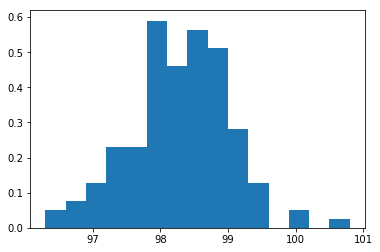

In [10]:
plt.hist(df.temperature,bins=15,normed=True)
plt.show()

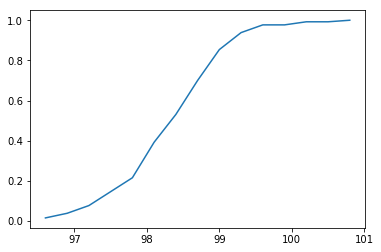

In [13]:
counts, bin_edges = np.histogram(df.temperature,bins=15,normed=True)
cdf = np.cumsum(counts)
plt.plot(bin_edges[1:],cdf/cdf[-1])
plt.show()

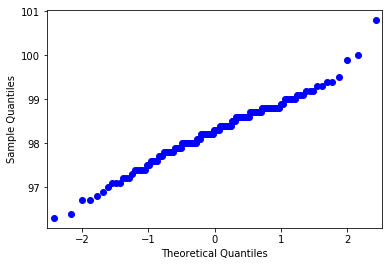

In [82]:
import statsmodels.api as sm
import pylab

x = df.temperature

sm.qqplot(x)
pylab.show()

In [80]:
x = df.temperature

shapiro_results = stats.shapiro(x)
print(shapiro_results)

(0.9865769743919373, 0.2331680953502655)


## Is the sample size large? Are the observations independent? 

In [20]:
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

## Is the true population mean really 98.6 degrees F? 

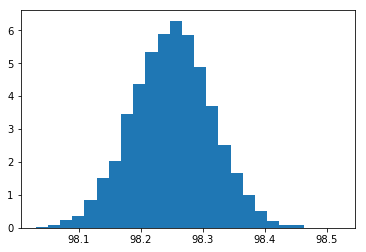

Approximation of true mean: 98.2500350769
Approximation of true mean (via median): 98.25


In [33]:
bs_sample_means = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(df.temperature,len(df.temperature))
    bs_sample_means[i] = np.mean(bs_sample)
plt.hist(bs_sample_means,bins=25,normed=True)
plt.show()
print("Approximation of true mean:",np.mean(bs_sample_means))
print("Approximation of true mean (via median):",np.median(bs_sample_means))

In [52]:
observ_mean = np.mean(df.temperature)
observ_std = np.std(df.temperature)
observ_count = df.temperature.count()

observ_t = (observ_mean - 98.6)/(observ_std/(np.sqrt(observ_count)))
print("Observed t-statistic")
print(observ_t)

print("t-statistic for p=0.05")
print(stats.t.ppf(1-0.025, df.temperature.count()))

observ_z = (observ_mean - 98.6)/(observ_std)

print("Observed z-statistic")
print(observ_z)

Observed t-statistic
-5.47592520208
t-statistic for p=0.05
1.97838040543
Observed z-statistic
-0.48027041116080765


## Draw a small sample of size 10 from the data and repeat both frequentist tests. 

In [53]:
rand_sample = np.random.choice(df.temperature,10)

observ_mean = np.mean(rand_sample)
observ_std = np.std(rand_sample)
observ_count = 10

observ_t = (observ_mean - 98.6)/(observ_std/(np.sqrt(observ_count)))
print("Observed t-statistic")
print(observ_t)

print("t-statistic for p=0.05")
print(stats.t.ppf(1-0.025, df.temperature.count()))


observ_z = (observ_mean - 98.6)/(observ_std)

print("Observed z-statistic")
print(observ_z)

Observed t-statistic
-4.05112205395
t-statistic for p=0.05
1.97838040543
Observed z-statistic
-1.28107727698


## At what temperature should we consider someone's temperature to be "abnormal"? 

In [59]:
bs_sample_means = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(df.temperature,len(df.temperature))
    bs_sample_means[i] = np.mean(bs_sample)

std_error = np.std(df.temperature)/np.sqrt(len(df.temperature))
print('Standard error:',std_error)
    
print("95% Confidence interval")
print(np.percentile(bs_sample,[2.5,97.5]))
print('We could reasoably consider temperatures following outside of this range as abnormal.')

Standard error: 0.0640566146952
95% Confidence interval
[ 96.4675  99.81  ]
We could reasoably consider temperatures following outside of this range as abnormal.


## Is there a significant difference between males and females in normal temperature? 

In [60]:
df_males = df[df.gender=='M']
df_females = df[df.gender=='F']

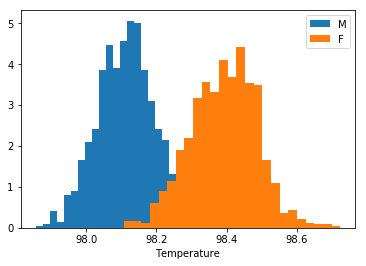

In [72]:
bs_sample_means_M = np.empty(1000)
bs_sample_means_F = np.empty(1000)
for i in range(1000):
    bs_sample_M = np.random.choice(df_males.temperature,len(df_males.temperature))
    bs_sample_F = np.random.choice(df_females.temperature,len(df_females.temperature))
    bs_sample_means_M[i] = np.mean(bs_sample_M)
    bs_sample_means_F[i] = np.mean(bs_sample_F)

male = bs_sample_means_M
female = bs_sample_means_F   

plt.hist(bs_sample_means_M,bins=25,normed=True)
plt.hist(bs_sample_means_F  ,bins=25,normed=True)

plt.xlabel('Temperature')
plt.legend('MF',loc='upper right')

plt.show()

In [78]:
df_males = df[df.gender=='M']
df_females = df[df.gender=='F']

mean_male = np.mean(df_males.temperature)
mean_female = np.mean(df_females.temperature)

denominator = np.sqrt((np.var(df_males.temperature)/len(df_males.temperature)) \
                      + (np.var(df_females.temperature)/len(df_females.temperature)))

t_stat = ((mean_female - mean_male)/denominator)

print(t_stat)

2.30322028919
